In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from statsmodels.formula.api import logit
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import SelectKBest, f_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
import imblearn.over_sampling as os
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.ensemble import RandomForestClassifier

In [3]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text

In [4]:
import seaborn as sns

In [5]:
df=pd.read_csv('df.csv')

<h1>Data Preparation

In [6]:
df=df.drop(columns='Unnamed: 0.1',axis='columns')
df=df.drop(columns='Unnamed: 0',axis='columns')
df=df.drop(columns='flag',axis='columns')

In [7]:
df.columns

Index(['duration', 'protocol_type', 'service', 'src_bytes', 'dst_bytes',
       'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins',
       'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
       'num_root', 'num_file_creations', 'num_shells', 'num_access_files',
       'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'srv_error_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'Attack'],
      dtype='object')

In [8]:
df.plot?

In [9]:
df.describe()

,duration,protocol_type,service,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.0,8.175510e+05,817551.000000,817551.000000,817551.000000,...,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000
mean,0.000877,0.000570,0.052909,0.004961,0.024862,0.0,3.669496e-07,0.000003,0.002456,0.000016,...,0.166868,0.161651,0.066795,0.003380,0.006148,0.001683,0.024865,0.024852,0.005372,0.005279
std,0.026636,0.002596,0.096389,0.033235,0.066635,0.0,3.317904e-04,0.000805,0.041470,0.001618,...,0.102058,0.111642,0.043421,0.008557,0.017460,0.003708,0.043062,0.043151,0.021920,0.022070
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000,0.000000,0.000000,...,0.054000,0.017000,0.007000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.002170,0.003670,0.0,0.000000e+00,0.000000,0.000000,0.000000,...,0.255000,0.255000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.120000,0.002990,0.019690,0.0,0.000000e+00,0.000000,0.000000,0.000000,...,0.255000,0.255000,0.100000,0.006000,0.003000,0.002000,0.014000,0.003000,0.000000,0.000000
max,1.000000,0.020000,0.670000,1.000000,1.000000,0.0,3.000000e-01,0.500000,1.000000,0.500000,...,0.255000,0.255000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000


<h1>Data Manipulation

C:\Users\VVLG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='service'>

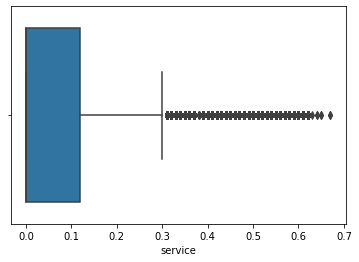

In [10]:
sns.boxplot(df.service)

In [11]:
print('75')
print(df.loc[:,['service','logged_in','count','serror_rate','srv_error_rate','same_srv_rate','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_serror_rate','dst_host_srv_serror_rate']].quantile(0.75))
print('----------------------------------')
print('99')
print(df.loc[:,['service','logged_in','count','serror_rate','srv_error_rate','same_srv_rate','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_serror_rate','dst_host_srv_serror_rate']].quantile(0.99))
print('----------------------------------')
print('Max')
print(df.loc[:,['service','logged_in','count','serror_rate','srv_error_rate','same_srv_rate','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_serror_rate','dst_host_srv_serror_rate']].max())

75
service                     0.120
logged_in                   0.100
count                       0.106
serror_rate                 0.015
srv_error_rate              0.017
same_srv_rate               0.100
dst_host_srv_count          0.255
dst_host_same_srv_rate      0.100
dst_host_diff_srv_rate      0.006
dst_host_serror_rate        0.014
dst_host_srv_serror_rate    0.003
Name: 0.75, dtype: float64
----------------------------------
99
service                     0.530
logged_in                   0.100
count                       0.296
serror_rate                 0.100
srv_error_rate              0.100
same_srv_rate               0.100
dst_host_srv_count          0.255
dst_host_same_srv_rate      0.100
dst_host_diff_srv_rate      0.040
dst_host_serror_rate        0.100
dst_host_srv_serror_rate    0.100
Name: 0.99, dtype: float64
----------------------------------
Max
service                     0.670
logged_in                   0.100
count                       0.511
serror_rate     

In [12]:
def outlier_func(x):
    if ((x.dtype=='float64') or (x.dtype=='int')):
        x=x.clip(lower=x.quantile(0.01),upper=x.quantile(0.99))
    else:
        x
    return x

In [13]:
df=df.apply(outlier_func)

In [14]:
print('75')
print(df.loc[:,['service','logged_in','count','serror_rate','srv_error_rate','same_srv_rate','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_serror_rate','dst_host_srv_serror_rate']].quantile(0.75))
print('----------------------------------')
print('99')
print(df.loc[:,['service','logged_in','count','serror_rate','srv_error_rate','same_srv_rate','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_serror_rate','dst_host_srv_serror_rate']].quantile(0.99))
print('----------------------------------')
print('Max')
print(df.loc[:,['service','logged_in','count','serror_rate','srv_error_rate','same_srv_rate','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_serror_rate','dst_host_srv_serror_rate']].max())

75
service                     0.120
logged_in                   0.100
count                       0.106
serror_rate                 0.015
srv_error_rate              0.017
same_srv_rate               0.100
dst_host_srv_count          0.255
dst_host_same_srv_rate      0.100
dst_host_diff_srv_rate      0.006
dst_host_serror_rate        0.014
dst_host_srv_serror_rate    0.003
Name: 0.75, dtype: float64
----------------------------------
99
service                     0.530
logged_in                   0.100
count                       0.296
serror_rate                 0.100
srv_error_rate              0.100
same_srv_rate               0.100
dst_host_srv_count          0.255
dst_host_same_srv_rate      0.100
dst_host_diff_srv_rate      0.040
dst_host_serror_rate        0.100
dst_host_srv_serror_rate    0.100
Name: 0.99, dtype: float64
----------------------------------
Max
service                     0.530
logged_in                   0.100
count                       0.296
serror_rate     

C:\Users\VVLG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='service'>

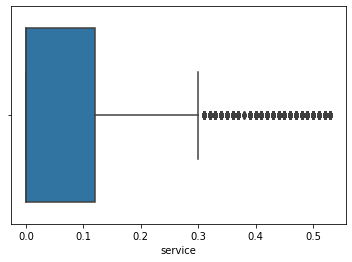

In [15]:
sns.boxplot(df.service)

df['service','logged_in','count','serror_rate','srv_error_rate','same_srv_rate','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_serror_rate','dst_host_srv_serror_rate'].plot

In [16]:
df.Attack.unique()

array(['Back', 'BufferOverflow', 'FTPWrite', 'GuessPassword', 'NMap',
       'Neptune', 'Normal', 'PortSweep', 'RootKit', 'Satan', 'Smurf'],
      dtype=object)

In [17]:
np.where?

In [18]:
df['Attack_Val']=np.nan

In [19]:
df['Attack_Val']=np.where(df.Attack=='Back',2,df.Attack_Val)
df['Attack_Val']=np.where(df.Attack=='BufferOverflow',3,df.Attack_Val)
df['Attack_Val']=np.where(df.Attack=='FTPWrite',4,df.Attack_Val)
df['Attack_Val']=np.where(df.Attack=='GuessPassword',5,df.Attack_Val)
df['Attack_Val']=np.where(df.Attack=='NMap',6,df.Attack_Val)
df['Attack_Val']=np.where(df.Attack=='Neptune',7,df.Attack_Val)
df['Attack_Val']=np.where(df.Attack=='Normal',1,df.Attack_Val)
df['Attack_Val']=np.where(df.Attack=='PortSweep',8,df.Attack_Val)
df['Attack_Val']=np.where(df.Attack=='RootKit',9,df.Attack_Val)
df['Attack_Val']=np.where(df.Attack=='Satan',10,df.Attack_Val)
df['Attack_Val']=np.where(df.Attack=='Smurf',11,df.Attack_Val)

In [20]:
df.shape[0]

817551

In [21]:
df.Attack_Val.value_counts()

1.0     576710
7.0     227228
10.0      5019
11.0      3007
8.0       2964
6.0       1554
2.0        968
5.0         53
3.0         30
9.0         10
4.0          8
Name: Attack_Val, dtype: int64

In [22]:
df.Attack_Val.unique()

array([ 2.,  3.,  4.,  5.,  6.,  7.,  1.,  8.,  9., 10., 11.])

In [23]:
X=df.drop(columns=['Attack_Val'],axis='columns')
X.drop(columns=['Attack'],inplace=True)
Y=df['Attack_Val']

In [24]:
X

,duration,protocol_type,service,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,0.00,0.00,0.07012,0.08314,0,0.0,0.0,0.0,0.0,...,0.001,0.001,0.100,0.000,0.100,0.0,0.0,0.0,0.0,0.0
1,0.0,0.00,0.00,0.07012,0.08314,0,0.0,0.0,0.0,0.0,...,0.002,0.002,0.100,0.000,0.050,0.0,0.0,0.0,0.0,0.0
2,0.0,0.00,0.00,0.07012,0.08314,0,0.0,0.0,0.0,0.0,...,0.003,0.003,0.100,0.000,0.033,0.0,0.0,0.0,0.0,0.0
3,0.0,0.00,0.00,0.07012,0.08314,0,0.0,0.0,0.0,0.0,...,0.004,0.004,0.100,0.000,0.025,0.0,0.0,0.0,0.0,0.0
4,0.0,0.00,0.00,0.07012,0.08314,0,0.0,0.0,0.0,0.0,...,0.005,0.005,0.100,0.000,0.020,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817546,0.0,0.01,0.09,0.01032,0.00000,0,0.0,0.0,0.0,0.0,...,0.255,0.251,0.098,0.001,0.098,0.0,0.0,0.0,0.0,0.0
817547,0.0,0.01,0.09,0.01032,0.00000,0,0.0,0.0,0.0,0.0,...,0.255,0.252,0.099,0.001,0.099,0.0,0.0,0.0,0.0,0.0
817548,0.0,0.01,0.09,0.01032,0.00000,0,0.0,0.0,0.0,0.0,...,0.255,0.253,0.099,0.001,0.099,0.0,0.0,0.0,0.0,0.0
817549,0.0,0.01,0.09,0.01032,0.00000,0,0.0,0.0,0.0,0.0,...,0.255,0.254,0.100,0.001,0.100,0.0,0.0,0.0,0.0,0.0


In [25]:
Y.nunique()

11

In [26]:
ros=RandomOverSampler(random_state=123)
resampled_X, resampled_y=ros.fit_resample(X,Y)

sm=SMOTE(sampling_strategy='not majority',n_jobs=-1)
resampled_X, resampled_y = sm.fit_resample(X, Y)

In [27]:
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(resampled_y)))

Original dataset shape Counter({1.0: 576710, 7.0: 227228, 10.0: 5019, 11.0: 3007, 8.0: 2964, 6.0: 1554, 2.0: 968, 5.0: 53, 3.0: 30, 9.0: 10, 4.0: 8})
Resampled dataset shape Counter({2.0: 576710, 3.0: 576710, 4.0: 576710, 5.0: 576710, 6.0: 576710, 7.0: 576710, 1.0: 576710, 8.0: 576710, 9.0: 576710, 10.0: 576710, 11.0: 576710})


In [28]:
resampled_y.nunique()

11

In [32]:
Y=resampled_y.sample(frac=.01)
X=resampled_X.loc[Y.index]

In [33]:
X.shape

(63438, 40)

In [34]:
Y.shape

(63438,)

In [35]:
print(X.index)

Int64Index([4496218,  576025, 4284697, 2072881, 2835419, 2232655, 3745814,
             705302, 4680666,  484519,
            ...
             438495, 4954660, 4399321, 3759646, 1111567, 5491847, 4451039,
            3678025,  406549, 5625829],
           dtype='int64', length=63438)


In [36]:
print(Y.index)

Int64Index([4496218,  576025, 4284697, 2072881, 2835419, 2232655, 3745814,
             705302, 4680666,  484519,
            ...
             438495, 4954660, 4399321, 3759646, 1111567, 5491847, 4451039,
            3678025,  406549, 5625829],
           dtype='int64', length=63438)


<h1><center>Feature Engineering

In [37]:
SKB = SelectKBest(f_classif,k=12).fit(X,Y)
X.columns[SKB.get_support()].values

C:\Users\VVLG\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 5  6  7  8  9 11 12 13 14 15 16 17 18 19 20] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\VVLG\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


array(['src_bytes', 'logged_in', 'count', 'srv_count', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'dst_host_count',
       'dst_host_same_srv_rate', 'dst_host_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate'], dtype=object)

In [38]:
Cols_List=[\
 'service', 'src_bytes', 'dst_bytes', 'logged_in', 'serror_rate',
       'srv_error_rate', 'same_srv_rate', 'dst_host_same_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_srv_rerror_rate'
]

In [39]:
X=X[Cols_List]
Y=Y

In [40]:
Final_data=df[Cols_List+['Attack_Val']]

<h1>Train Test Split

train_X=X.sample(frac=0.7)
test_X=X.sample(frac=0.2)
train_Y=Y.loc[train_X.index]
test_Y=Y.loc[test_X.index]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,stratify=Y)

In [42]:
y_train.nunique()

11

In [43]:
y_test.nunique()

11

In [44]:
y_train.shape

(50750,)

In [45]:
X_train.shape

(50750, 12)

y_train=y_train.sample(frac=0.1)
y_test=y_test.sample(frac=0.07)
X_train=X_train.loc[y_train.index]
X_test=X_test.loc[y_test.index]

<h1><center>Model Building

## Logistic Regression

In [46]:
model=LogisticRegression(max_iter=10000,n_jobs=-1)
model.fit(X_train,y_train)

LogisticRegression(max_iter=10000, n_jobs=-1)

In [47]:
print(model.score(X_train,y_train))

0.8035073891625616


In [51]:
print(model.score(X_test,y_test))

0.7980769230769231


In [63]:
mod_pred=model.predict(X_train)

In [64]:
cm=confusion_matrix(y_train,mod_pred)
print(cm)

[[4726    0    0    0    0    0    0    0    0    0    0]
 [   0 4578    0    0    0    0    0    0    0    0    0]
 [   0    0 4522    0    0    0    0    0    0    0    0]
 [   0    0    0 4590    0    0    0    0    0    0    0]
 [   0    0    0    0 4632    0    0    0    0    0    0]
 [   0    0    0    0    0 4626    0    0    0    0    0]
 [   0    0    0    0    0    0 4622    0    0    1    0]
 [   0    0    0    0    0    1    0 4713    0    0    0]
 [   0    0    0    0    0    0    0    0 4560    0    0]
 [   1    0    0    0    0    0    0    1    0 4590    0]
 [   0    0    0    0    0    0    0    0    0    0 4587]]


Text(159.0, 0.5, 'Train')

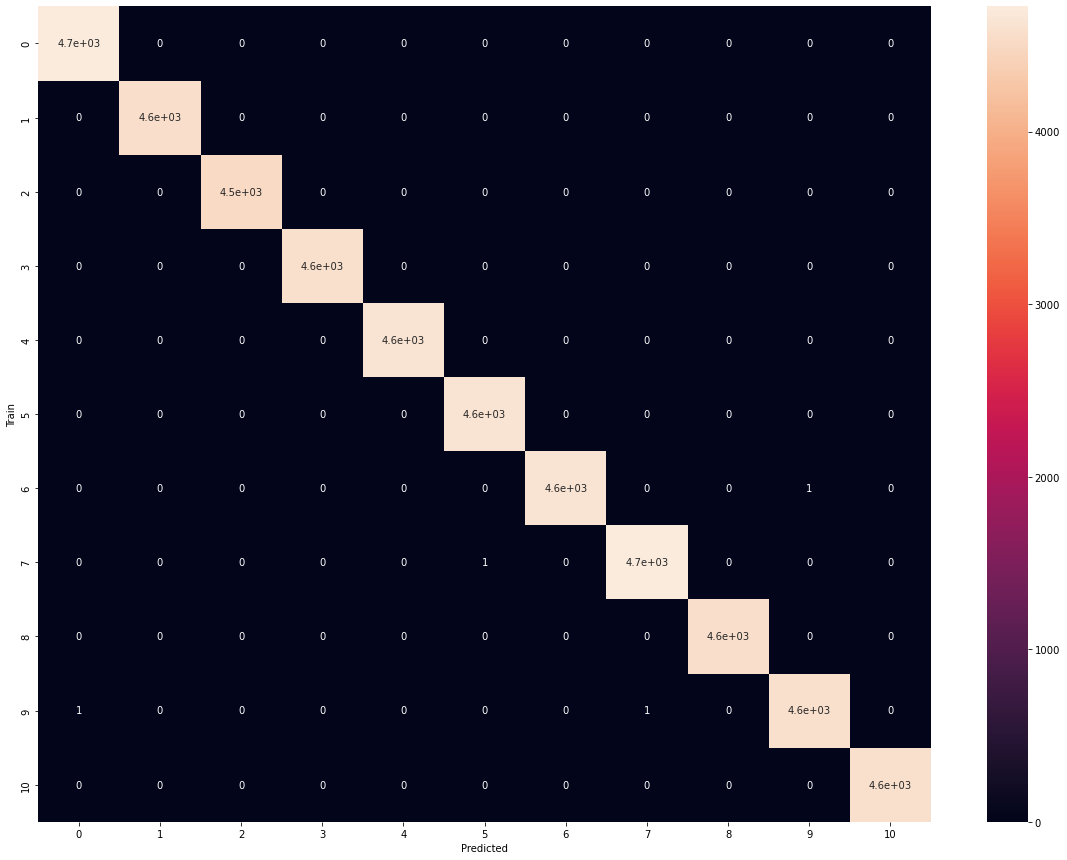

In [65]:
plt.figure(figsize=(20,15))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Train')

In [53]:
mod_pred_test=model.predict(X_test)

In [54]:
cm_2=confusion_matrix(y_test,mod_pred_test)
print(cm_2)

[[1021   20   18   11   30   10    0    0   50    6   15]
 [   0 1144    0    0    0    0    0    0    0    0    0]
 [   0    0  814  317    0    0    0    0    0    0    0]
 [   0    0  292  714    0    0    0    0    0    0  141]
 [   0    0    0    0 1105   53    0    0    0    0    0]
 [   0    0    0    9    0  967    3   11   31    2  134]
 [   0    0    0    0    1    1 1043    5    0  106    0]
 [   3    0    0    4    0    3   48 1001   10   99   11]
 [   0    0    0  126    0  120    0    0  774    0  120]
 [   1    0    0    1    0   13    4   10   55 1003   61]
 [   0    0    0    0    0  484    0    0  123    0  540]]


Text(159.0, 0.5, 'Test')

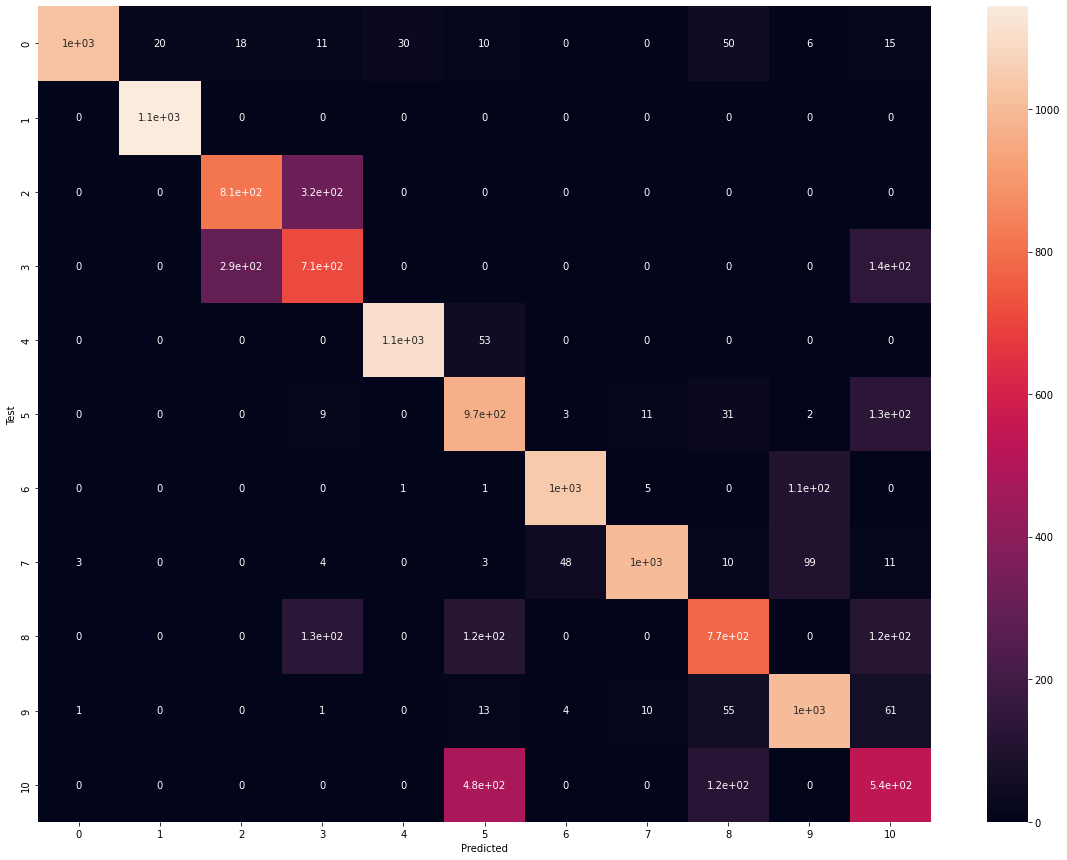

In [62]:
plt.figure(figsize=(20,15))
sns.heatmap(cm_2,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Test')

<center><b><font color=blue>There are many miss-classifications while performing logistic regression, so we shall try another technique

<h2>Random Forest

grid={'max_depth':[3,4,5,6,7,8],'max_leaf_nodes':[5,6,7,8,9,10],'max_features':[6,7,8,9,10]}
DTC=GridSearchCV(DecisionTreeClassifier(),grid,cv=5,verbose=True,n_jobs=-1)
DTC.fit(train_X,train_Y)

In [56]:
model=RandomForestClassifier(n_estimators=10)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [57]:
model.score(X_test,y_test)

0.9990542244640606

In [58]:
pd.concat([pd.Series(y_test.values),pd.Series(model.predict(X_test))],axis='columns')

,0,1
0,11.0,11.0
1,7.0,7.0
2,9.0,9.0
3,7.0,7.0
4,3.0,3.0
...,...,...
12683,9.0,9.0
12684,4.0,4.0
12685,7.0,7.0
12686,6.0,6.0


In [59]:
cm=confusion_matrix(y_test,model.predict(X_test))
cm

array([[1177,    0,    0,    0,    0,    1,    0,    2,    0,    1,    0],
       [   0, 1144,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 1131,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 1147,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 1158,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 1157,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 1154,    0,    0,    2,    0],
       [   0,    0,    0,    0,    0,    0,    0, 1178,    0,    1,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 1140,    0,    0],
       [   2,    0,    0,    0,    0,    0,    1,    2,    0, 1143,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 1147]],
      dtype=int64)

Text(159.0, 0.5, 'True')

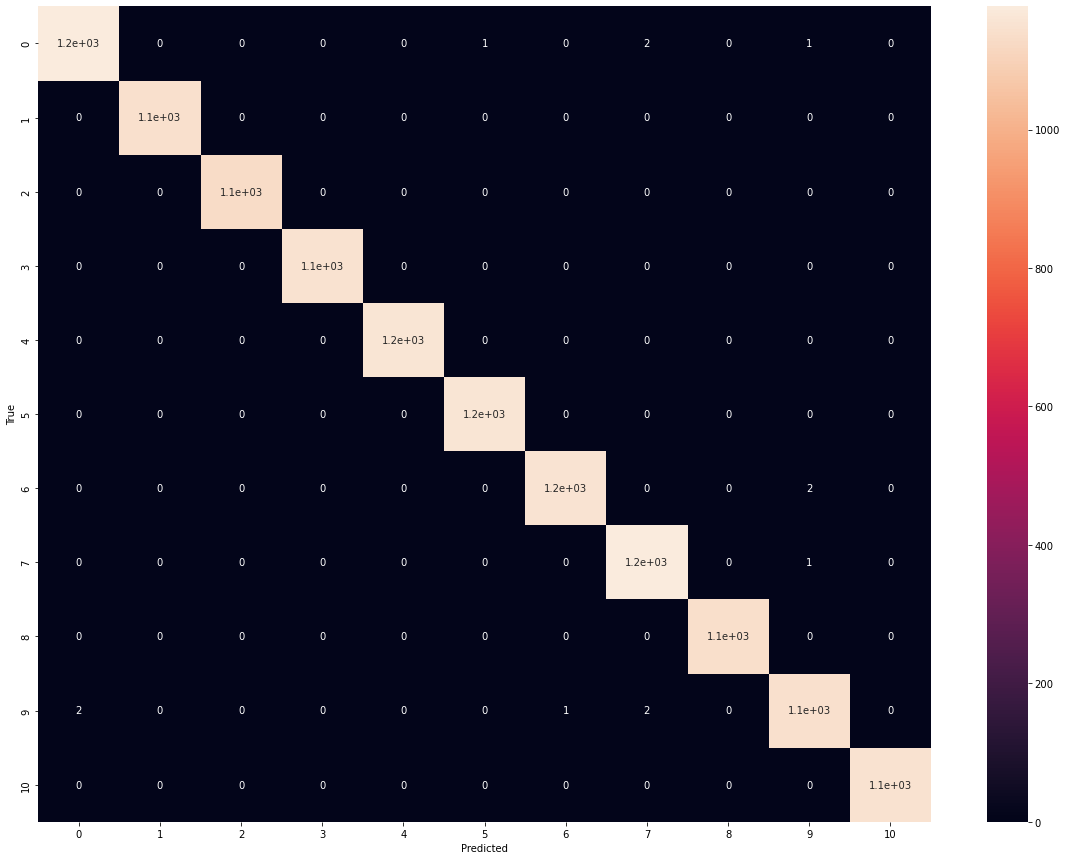

In [61]:
plt.figure(figsize=(20,15))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')

<b><i><center>Now that the accuracy is 99% and there is very less miss-classifications, the best model to use is Random Forest.